<a href="https://colab.research.google.com/github/dPai12/FakeNewsDetection/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## libraries neeeded
import pandas as pd
import numpy as np
import re
import nltk


In [6]:
## import csv into pandas df
df = pd.read_csv('/content/WELFake_Dataset.csv')

In [7]:
X= df.drop('label', axis=1)
## X is main df without the target variable

In [8]:
X.head()

,Unnamed: 0,title,text
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...
1,1,NaN,Did they post their votes for Hillary already?
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ..."
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will..."


In [9]:
Y=df['label']
Y.head()
## Y is the target variable from the main df

0    1
1    1
2    1
3    0
4    1
Name: label, dtype: int64

In [10]:
df.shape

(72134, 4)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [12]:
df = df.dropna()

In [13]:
messages = df.copy()
## messages is a copy of the df after dropping na rows

In [14]:
messages['title']

0        LAW ENFORCEMENT ON HIGH ALERT Following Threat...
2        UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3        Bobby Jindal, raised Hindu, uses story of Chri...
4        SATAN 2: Russia unvelis an image of its terrif...
5        About Time! Christian Group Sues Amazon and SP...
                               ...                        
72129    Russians steal research on Trump in hack of U....
72130     WATCH: Giuliani Demands That Democrats Apolog...
72131    Migrants Refuse To Leave Train At Refugee Camp...
72132    Trump tussle gives unpopular Mexican leader mu...
72133    Goldman Sachs Endorses Hillary Clinton For Pre...
Name: title, Length: 71537, dtype: object

In [15]:
messages.reset_index(inplace=True)

In [16]:
messages.head()

,index,Unnamed: 0,title,text,label
0,0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
2,3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
3,4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
4,5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [17]:
messages['title'][1]

'UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO]'

In [18]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download('stopwords')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def clean(text):
    text=re.sub(r'[^\w\s]',' ',text).lower()   ### Remove punctuation by removing non-space alpha-num characters
    words=re.split(r'\W+', text)                   ### Split by remaining non-alphanumeric characters
    non_stop_words=[word for word in words if word not in stopwords.words('english')]        ### Remove stopwords
    lem_words= [wn.lemmatize(word) for word in non_stop_words]             ### Clean text ==
    clean_text= ' '.join(lem_words)
    return clean_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [19]:
corpus = messages['title'].apply(clean)
## corpus is cleaned text from messages

In [20]:
## Bag of Words
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
# transforms corpus into a np array - a matrix of token counts -
# where each row corresponds to a document, and each column corresponds to a feature (word or n-gram)

In [21]:
X.shape

(71537, 5000)

In [22]:
y=messages['label']
# y is the target variable taken from messages

In [23]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [24]:
cv.get_feature_names_out()[:20]

array(['000', '000 email', '000 job', '10', '10 000', '10 year', '100',
       '100 000', '100 day', '11', '12', '13', '14', '15', '150', '16',
       '17', '18', '19', '20'], dtype=object)

In [25]:

cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [26]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())
## This method retrieves the feature names (words or tokens) associated with
# the columns of the transformed data obtained from the CountVectorizer

In [27]:
count_df.head()
## The resulting DataFrame count_df has rows corresponding to the samples in
# the training data and columns corresponding to the unique words or tokens in the vocabulary.

,000,000 email,000 job,10,10 000,10 year,100,100 000,100 day,11,...,zor,zuckerberg,zuma,восточное,восточное обозрение,на,новое,новое восточное,новое восточное обозрение,обозрение
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
import matplotlib.pyplot as plt

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


## Picking a model
The data is text-based, and the target variable is categorical, requiring a classification approach. Classification models that can be used MultinomialNB, Logistic Regression, SVM, PassiveAggressive Classifier, RandomForest etc.

Considering the nature of the data - textual, with word frequencies and possibly dynamic, we pick MultinomialNB, PassiveAggressive Classifier and SVM algorithms.

### 1. MultinomialNaiveBayes Model

Definition
A probabilistic classification algorithm based on Bayes' theorem. It's specifically designed for text classification tasks where the features are word counts or term frequencies.

-Text Classification:
Primarily designed for text classification tasks, where the features represent word counts or term frequencies.

-Feature Independence Assumption:
Assumes independence between features (words) given the class label, simplifying the modeling process.

-Multinomial Distribution:
Specifically suited for data that follows a multinomial distribution, making it suitable for discrete data like word counts.

-Efficiency and Scalability:
Computationally efficient and scales well with the size of the dataset, making it suitable for both small and large datasets.

-Application in Document Classification:
Commonly used in tasks like document classification, spam filtering, and sentiment analysis.


In [30]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [31]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.868
Confusion matrix, without normalization


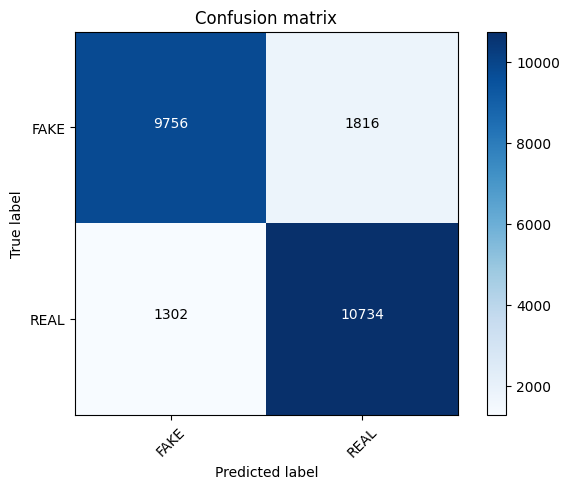

In [32]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [35]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score


0.8679261267366994

In [34]:
y_train.shape

(47929,)

## Passive Aggressive Classifier Algorithm
Definition:
The Passive Aggressive Classifier is an online learning algorithm for binary and multiclass classification. It is particularly useful in scenarios where the data distribution may change over time, making it adaptable to new observations.

Top 5 Characteristics:

Online Learning:
- Adaptability: PAC is designed for online learning, meaning it can continuously update its model parameters as new data becomes available. This makes it suitable for dynamic datasets.

Efficiency:
- Computationally Efficient: PAC is computationally efficient, making it suitable for real-time applications and scenarios with large streaming datasets.

Concept Drift Handling:
- Dynamic Adaptation: The algorithm is capable of handling concept drift, adjusting its model to changes in the underlying data distribution over time.

Binary and Multiclass Classification:
- Versatility: PAC can be applied to both binary and multiclass classification tasks, providing flexibility for various types of problems.

Margin Maximization:
- Aggressive Update: The algorithm aims to minimize errors while maximizing the margin, making it "passive" when predictions are correct and "aggressive" when mistakes are made, adjusting the model to correct errors.


In [37]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.825
Confusion matrix, without normalization


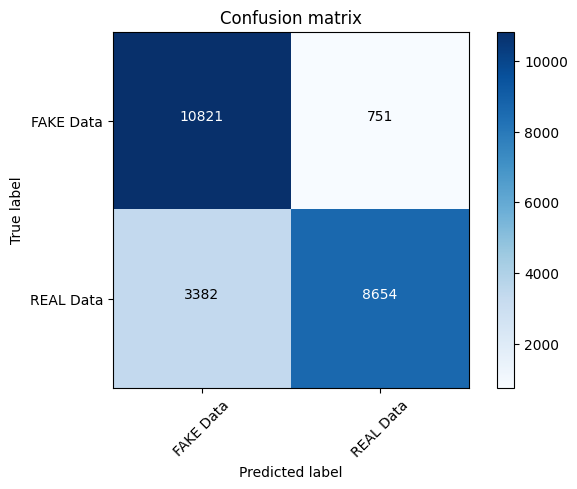

In [38]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [39]:
## Higher False Negatives - The model is missing positive instances.
# It is failing to identify instances that actually belong to the positive class